# Q3 Ridge Regression

how to run:

1. change directories of x_data and y_data respectively
2. run all cells below until end

## 3A

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys

x = np.loadtxt("/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/3/hw1_ridge_x.dat", delimiter=",")
y = np.loadtxt("/Users/anthonymunoz/ISTDTerm6/MachineLearning/data/3/hw1_ridge_y.dat", delimiter=",")
validation_x = x[:10]
validation_y = y[:10]
training_x = x[10:]
training_y = y[10:]

In [2]:
def ridge_regression(x, y, lambd):
    xtx = np.dot(np.transpose(x), x)
    xty = np.dot(np.transpose(x), y)
    n = x.shape[0]
    identity = np.identity(len(xtx))
    expression = n * lambd* identity + xtx
    weight = np.dot(np.linalg.inv(expression), xty)
    return weight

In [3]:
print("The weight obtained from ridge regression is: {}".format(ridge_regression(training_x, training_y, 0.15)))

The weight obtained from ridge regression is: [-0.57939825  1.15033028  0.04934122 -1.59867896]


## 3B

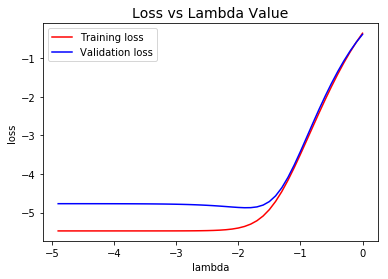

In [4]:
tn = training_x.shape[0]
vn = validation_x.shape[0]

training_loss = []
validation_loss = []

index = -np.arange(0, 5, 0.1)
for i in index:
    w = ridge_regression(training_x, training_y, 10**i)
    training_loss += [np.sum((np.dot(training_x , w) - training_y)**2) / tn / 2 ]
    validation_loss += [np.sum((np.dot(validation_x , w) - validation_y)**2 ) / vn / 2 ]
    

plt.plot(index, np.log(training_loss), 'r', label='Training loss')
plt.plot(index, np.log(validation_loss), 'b', label='Validation loss')
plt.legend()
plt.title("Loss vs Lambda Value", fontsize=14)
plt.xlabel('lambda')
plt.ylabel('loss')
plt.show()